# Final Project Graphs

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/schmidty/Desktop/Data Wrang/Project 1/Movies Box Office Collection Data/cleaned_final_merged_movies.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Clean the column names by stripping any leading or trailing spaces
df.columns = df.columns.str.strip()

# Rename columns to match the analysis requirements
df.rename(columns={'box_office': 'Worldwide', 'directors': 'Director', 'genre': 'Genre'}, inplace=True)

# Replace 'Not Available' with NaN and then convert Worldwide column to numeric
df['Worldwide'] = df['Worldwide'].replace('Not Available', pd.NA)
df['Worldwide'] = df['Worldwide'].str.replace(',', '')

# Convert Worldwide column to numeric, coercing errors to NaN
df['Worldwide'] = pd.to_numeric(df['Worldwide'], errors='coerce')

              Name of Movie  Year of Release  Movie Rating  rank  \
0  The Shawshank Redemption             1994           9.3     1   
1             The Godfather             1972           9.2     2   
2           The Dark Knight             2008           9.0     3   
3     The Godfather Part II             1974           9.0     4   
4              12 Angry Men             1957           9.0     5   

                       name  year               genre certificate run_time  \
0  The Shawshank Redemption  1994               Drama           R   2h 22m   
1             The Godfather  1972         Crime,Drama           R   2h 55m   
2           The Dark Knight  2008  Action,Crime,Drama       PG-13   2h 32m   
3     The Godfather Part II  1974         Crime,Drama           R   3h 22m   
4              12 Angry Men  1957         Crime,Drama    Approved   1h 36m   

                                             tagline     budget  box_office  \
0  Fear can hold you prisoner. Hope can set

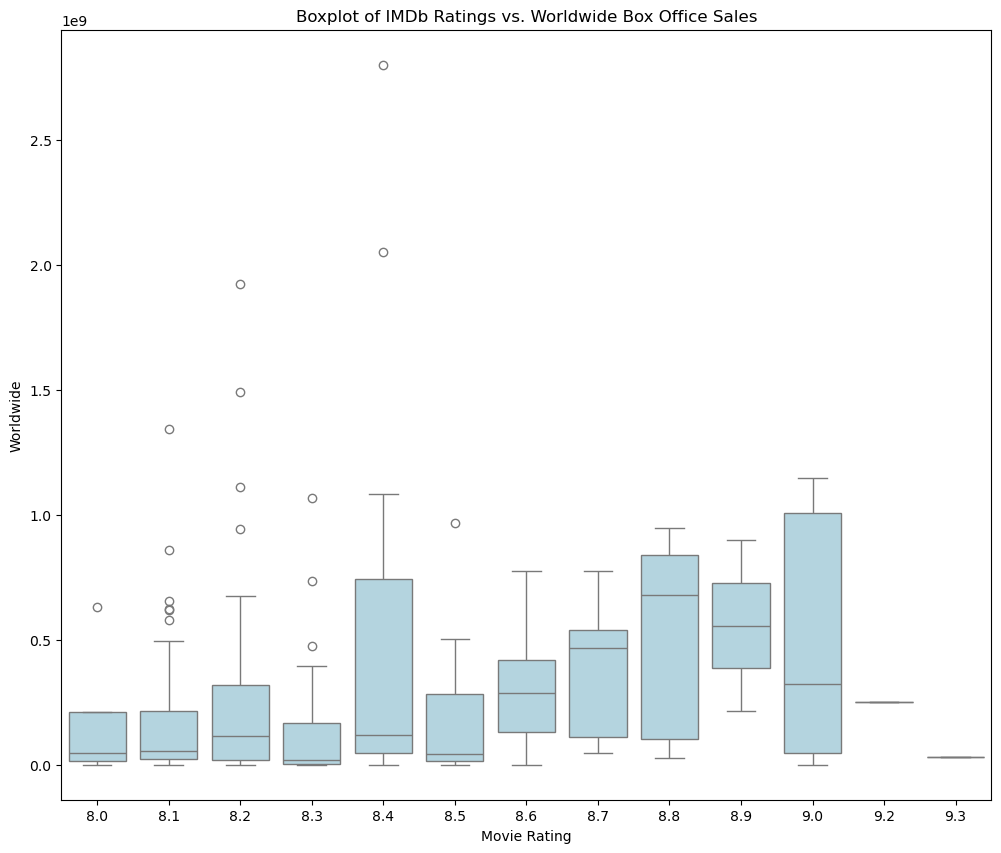

In [38]:
# 1. Boxplot of IMDb Ratings vs. Worldwide Box Office Sales with light blue color
plt.figure(figsize=(12, 10))
sns.boxplot(x='Movie Rating', y='Worldwide', data=df, color='lightblue')
plt.title('Boxplot of IMDb Ratings vs. Worldwide Box Office Sales')
plt.show()

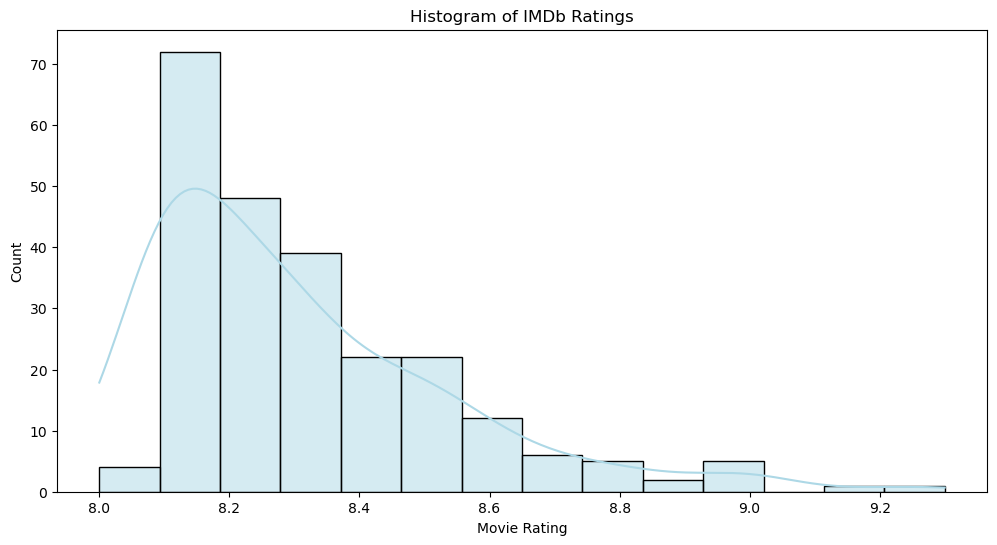

In [39]:
# 2. Histogram of IMDb Ratings with light blue color
plt.figure(figsize=(12, 6))
sns.histplot(df['Movie Rating'], kde=True, color='lightblue')
plt.title('Histogram of IMDb Ratings')
plt.show()

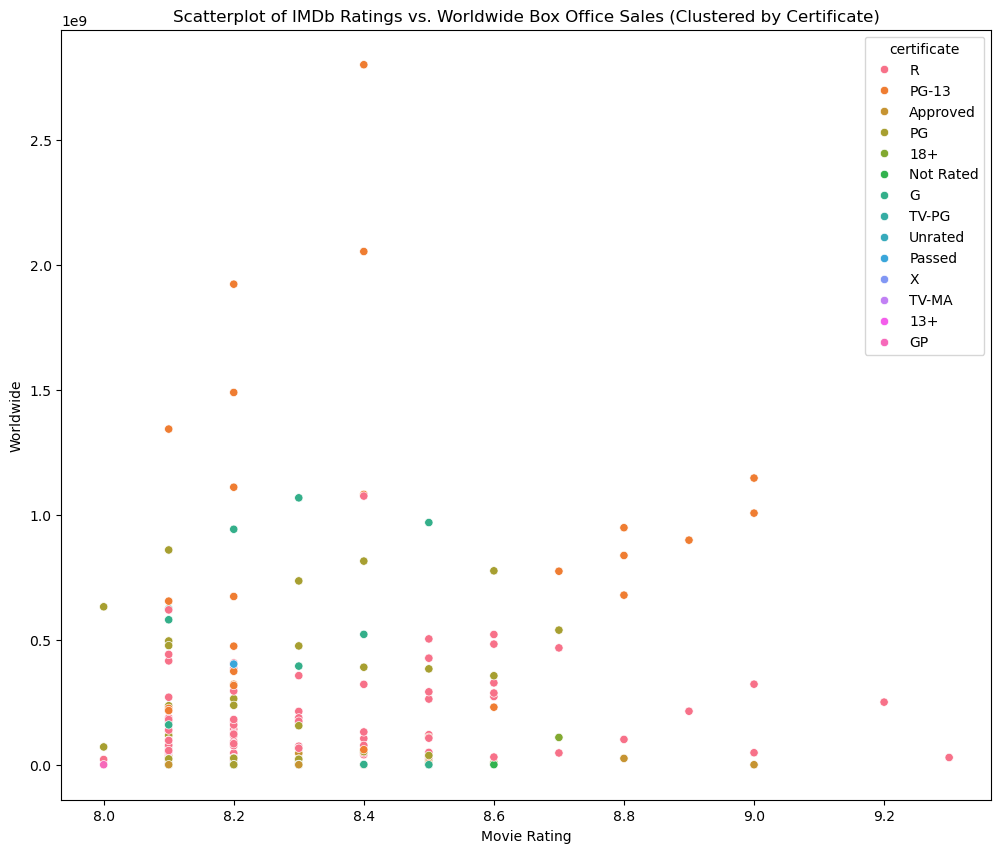

In [34]:
# 3. Scatterplot of IMDb Ratings vs. Worldwide Box Office Sales, clustered based on certificate
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Movie Rating', y='Worldwide', hue='certificate', data=df)
plt.title('Scatterplot of IMDb Ratings vs. Worldwide Box Office Sales (Clustered by Certificate)')
plt.show()

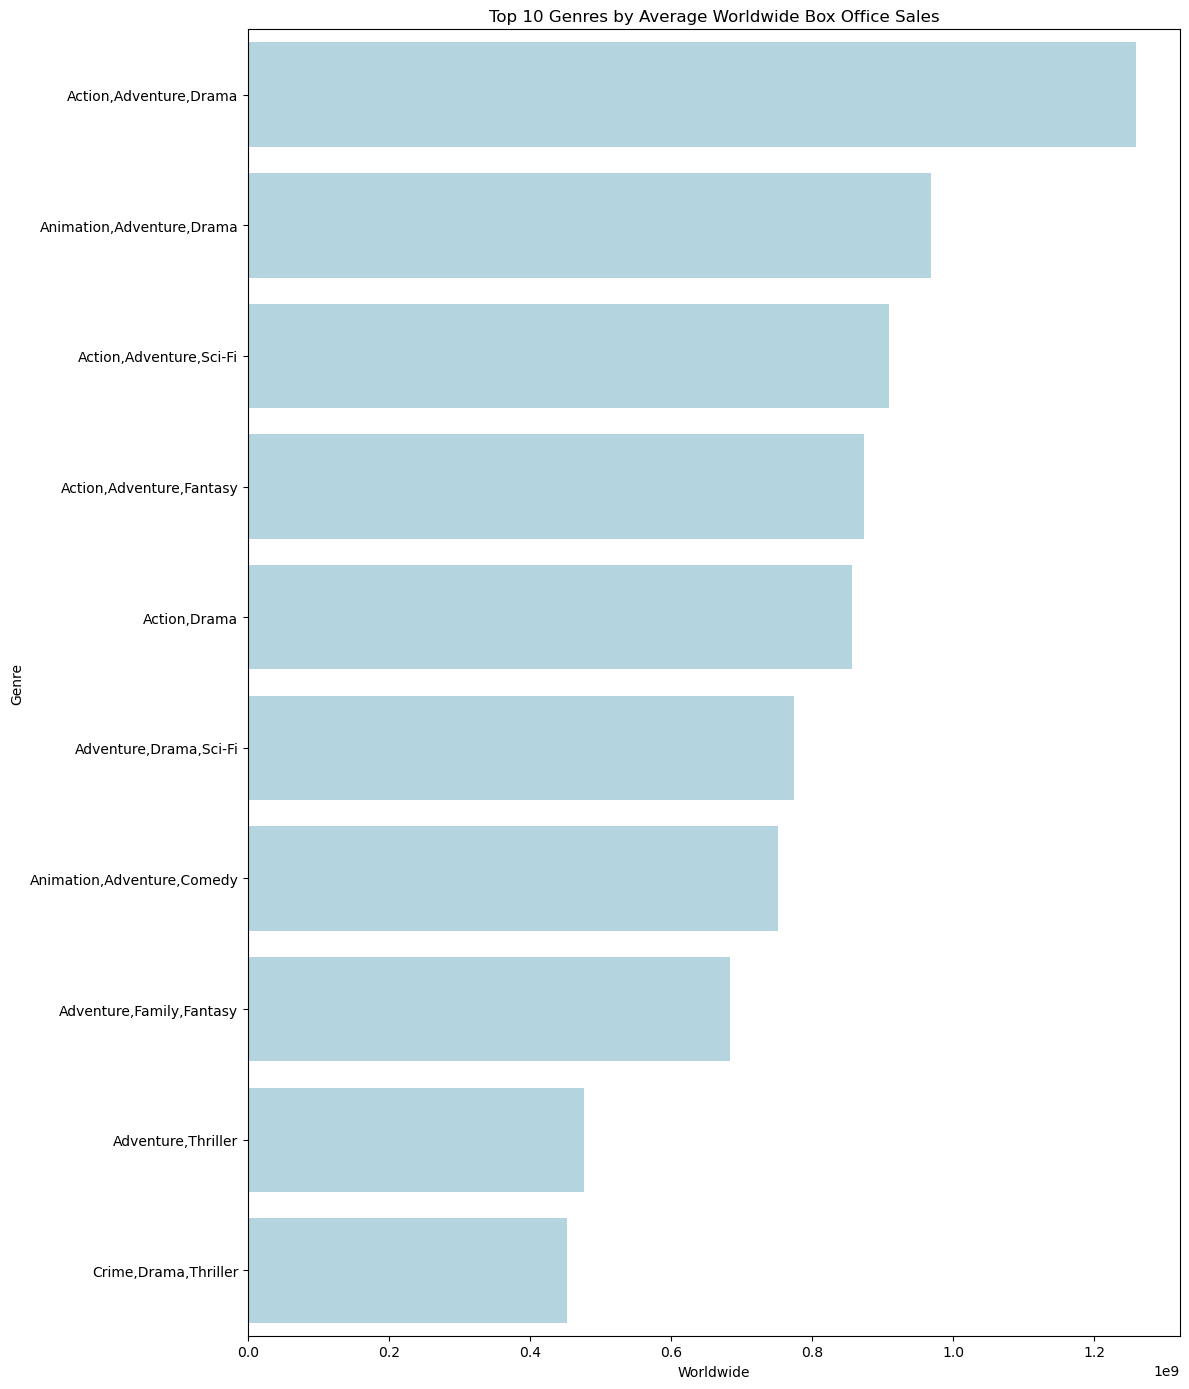

In [47]:
# Group by Genre and calculate average sales, then sort by most to least and select top 10 genres
if 'Genre' in df.columns:
    genre_sales = df.groupby('Genre').agg({'Worldwide': 'mean'}).reset_index()
    genre_sales = genre_sales.sort_values(by='Worldwide', ascending=False).head(10)

    # 4. Horizontal Bar Chart of Average Worldwide Box Office Sales by Genre with adjusted y-axis labels
    plt.figure(figsize=(12, 14))
    sns.barplot(x='Worldwide', y='Genre', data=genre_sales, orient='h', color='lightblue')
    plt.title('Top 10 Genres by Average Worldwide Box Office Sales')
    plt.tight_layout()
    plt.show()

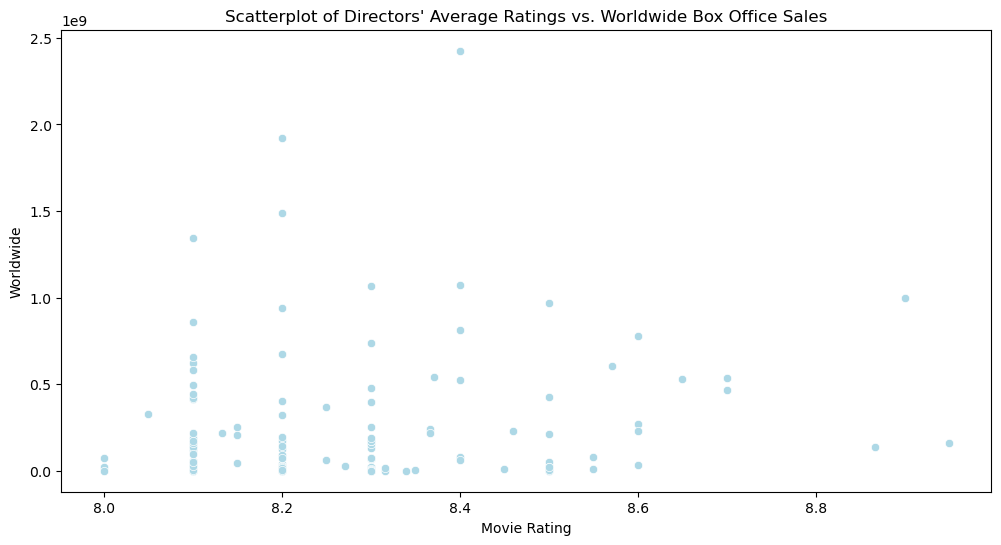

In [41]:
# Group by Director and calculate average ratings and sales
if 'Director' in df.columns:
    director_success = df.groupby('Director').agg({'Movie Rating': 'mean', 'Worldwide': 'mean'}).reset_index()

    # 5. Scatterplot of Directors' Average Ratings vs. Worldwide Box Office Sales
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Movie Rating', y='Worldwide', data=director_success, color='lightblue')
    plt.title('Scatterplot of Directors\' Average Ratings vs. Worldwide Box Office Sales')
    plt.show()

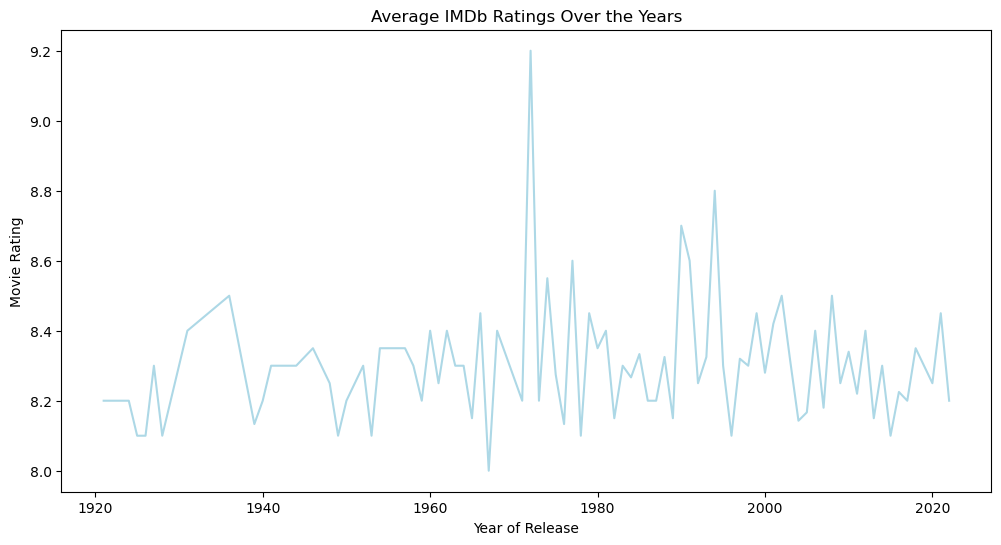

In [42]:
# Group by Year of Release and calculate average ratings and sales
yearly_trends = df.groupby('Year of Release').agg({'Movie Rating': 'mean', 'Worldwide': 'mean'}).reset_index()

# 6. Line Chart of Average IMDb Ratings Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year of Release', y='Movie Rating', data=yearly_trends, color='lightblue')
plt.title('Average IMDb Ratings Over the Years')
plt.show()

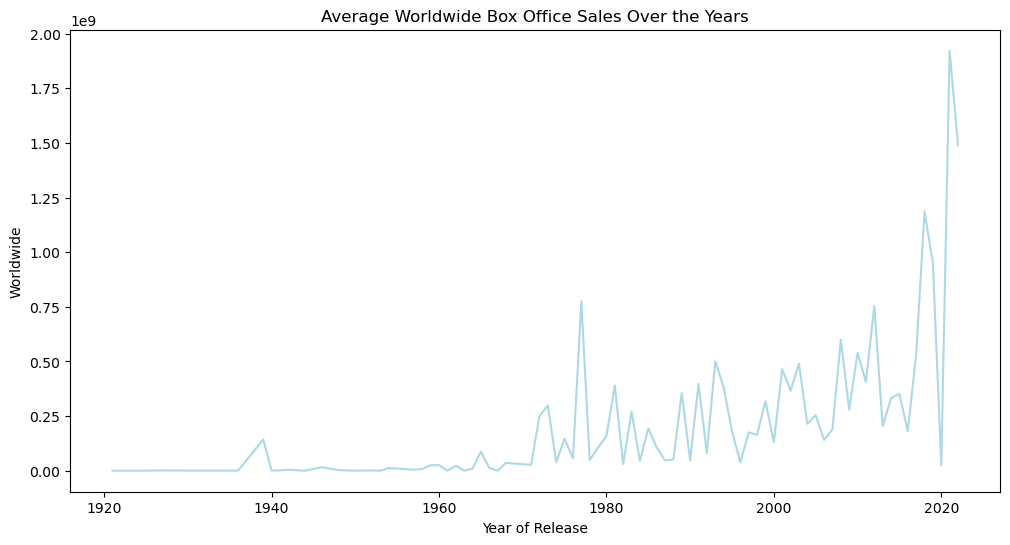

In [43]:
# 7. Line Chart of Average Worldwide Box Office Sales Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year of Release', y='Worldwide', data=yearly_trends, color='lightblue')
plt.title('Average Worldwide Box Office Sales Over the Years')
plt.show()

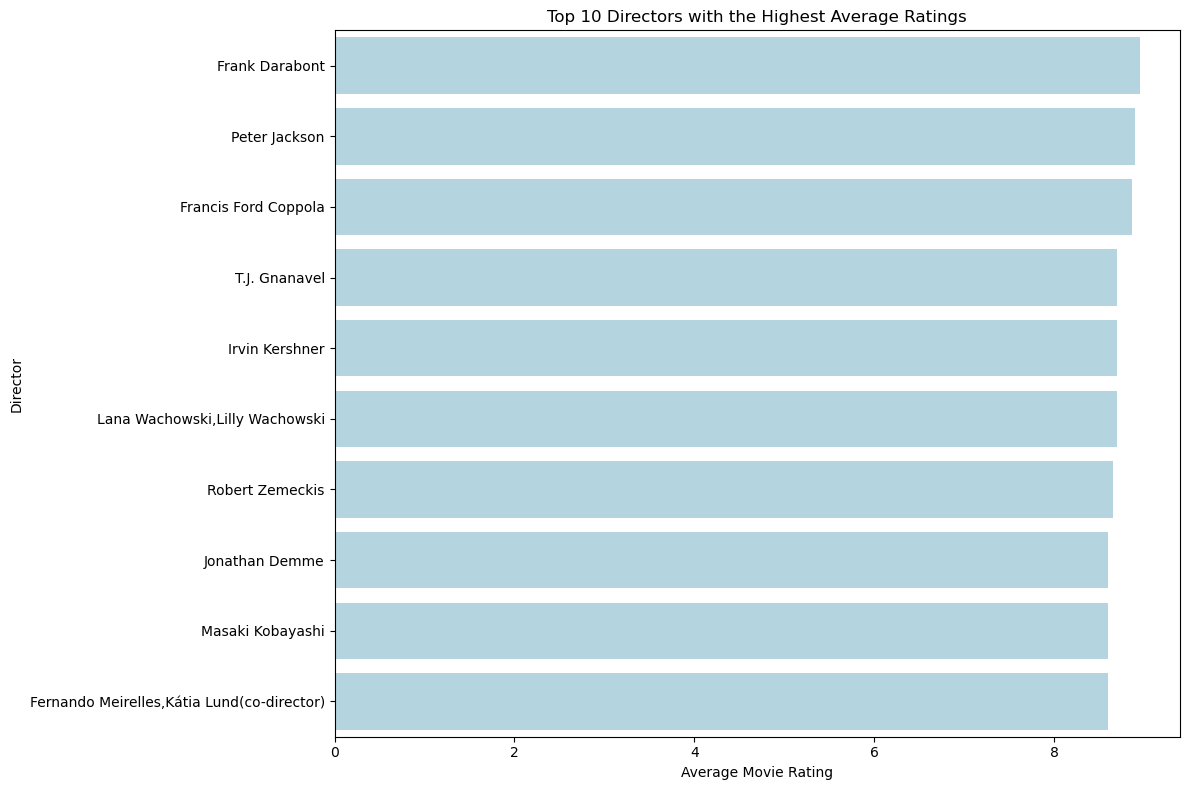

In [44]:
# 8.
# Group by Director and calculate average ratings
director_ratings = df.groupby('Director').agg({'Movie Rating': 'mean'}).reset_index()

# Sort directors by average rating in descending order and select top 10 directors
top_directors = director_ratings.sort_values(by='Movie Rating', ascending=False).head(10)

# Create a histogram for directors with the highest ratings
plt.figure(figsize=(12, 8))
sns.barplot(x='Movie Rating', y='Director', data=top_directors, orient='h', color='lightblue')
plt.title('Top 10 Directors with the Highest Average Ratings')
plt.xlabel('Average Movie Rating')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

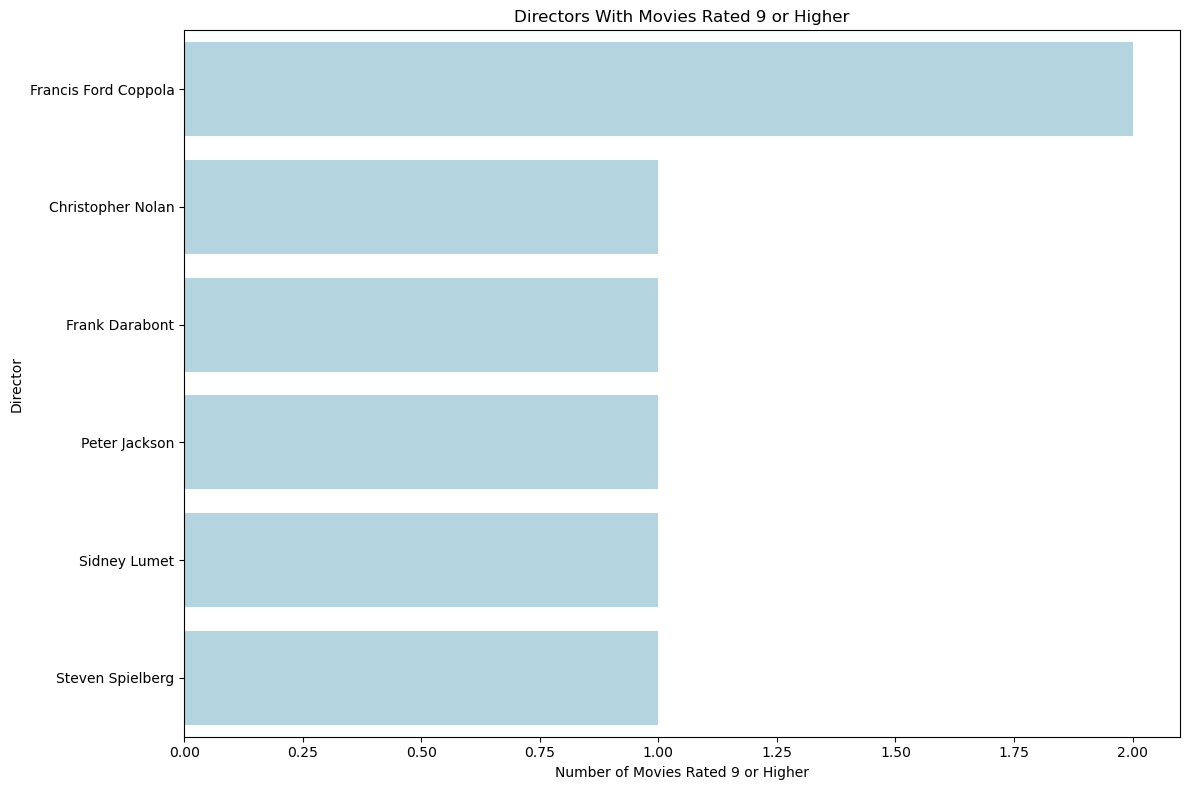

In [45]:
# 9. Horizontal Bar Char Showing Movie Directors with Movies Rated Higher than 9
# Filter movies with a rating of 9 or higher
high_rated_movies = df[df['Movie Rating'] >= 9]

# Check if the 'Director' column exists and is not empty
if 'Director' in high_rated_movies.columns and not high_rated_movies['Director'].isnull().all():
    # Group by Director and count the number of high rated movies
    director_high_rated_count = high_rated_movies.groupby('Director').size().reset_index(name='Count')

    # Sort directors by count in descending order and select top 10 directors
    top_directors_high_rated = director_high_rated_count.sort_values(by='Count', ascending=False).head(10)

    # Create a histogram for directors with the most movies rated 9 or higher
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Count', y='Director', data=top_directors_high_rated, orient='h', color='lightblue')
    plt.title('Directors With Movies Rated 9 or Higher')
    plt.xlabel('Number of Movies Rated 9 or Higher')
    plt.ylabel('Director')
    plt.tight_layout()
    plt.show()
else:
    print("The 'Director' column does not exist or is empty in the filtered dataset.")

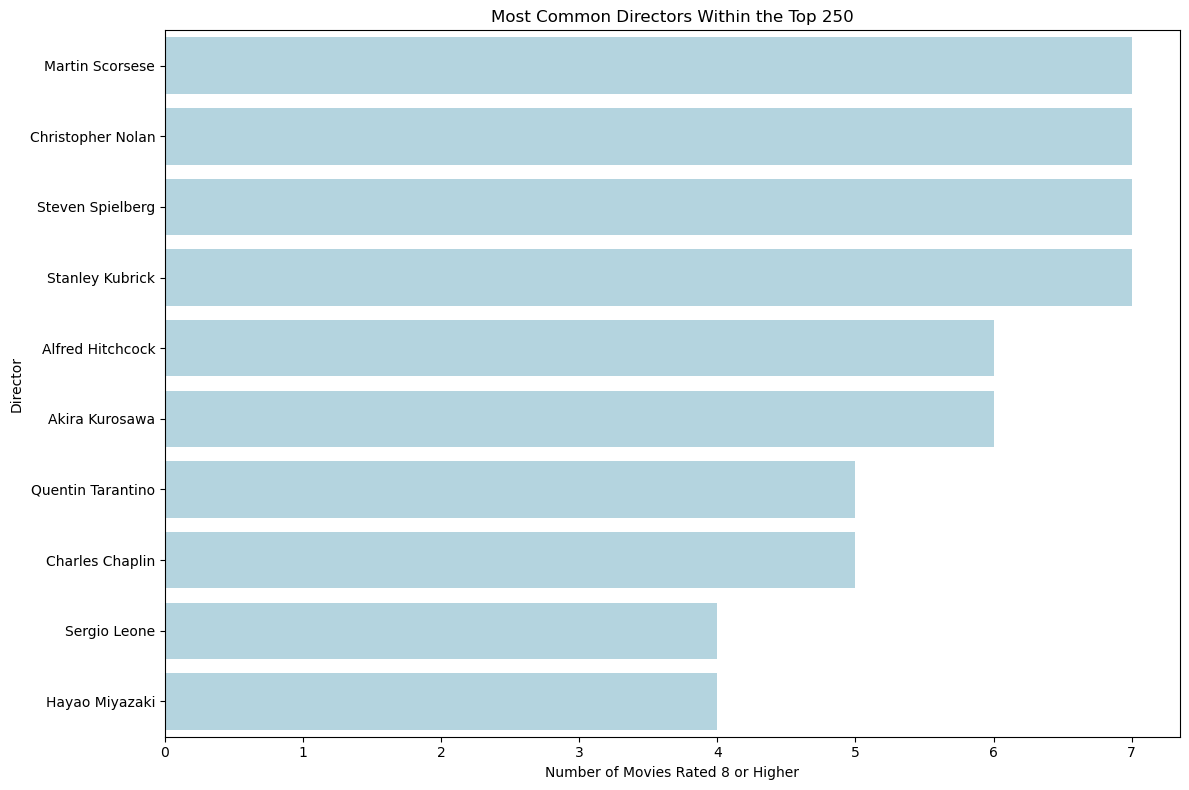

In [46]:
# Filter movies with a rating of 8 or higher
high_rated_movies_8 = df[df['Movie Rating'] >= 8]

# Check if the 'Director' column exists and is not empty
if 'Director' in high_rated_movies_8.columns and not high_rated_movies_8['Director'].isnull().all():
    # Group by Director and count the number of high rated movies
    director_high_rated_count_8 = high_rated_movies_8.groupby('Director').size().reset_index(name='Count')

    # Sort directors by count in descending order and select top 10 directors
    top_directors_high_rated_8 = director_high_rated_count_8.sort_values(by='Count', ascending=False).head(10)

    # Create a histogram for directors with the most movies rated 8 or higher
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Count', y='Director', data=top_directors_high_rated_8, orient='h', color='lightblue')
    plt.title('Most Common Directors Within the Top 250')
    plt.xlabel('Number of Movies Rated 8 or Higher')
    plt.ylabel('Director')
    plt.tight_layout()
    plt.show()
else:
    print("The 'Director' column does not exist or is empty in the filtered dataset.")